In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import sqlite3
import re

import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import keras

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import string

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras import layers
from keras.preprocessing.sequence import pad_sequences



In [2]:
con = sqlite3.connect('/home/yura/PycharmProjects/news-filter/data/db/news_filter.db')

data = pd.read_sql_query("SELECT id, content, category FROM article", con)

In [3]:
data.dropna(inplace=True)

data['category'] = data['category'].astype(int)

In [4]:
def remove_digits(data):
    data = re.sub(r'\d+', '', data)
    return data


In [5]:
data['content'] = data['content'].apply(remove_digits)

In [6]:
train, test = train_test_split(data, test_size = 0.1, random_state=1)

In [27]:
X_train = train['content'].values
X_test = test['content'].values

y_train = train['category'].values
y_test = test['category'].values

In [53]:
'''VOCAB_SIZE = 1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(X_train)

vocab = np.array(encoder.get_vocabulary())
vocab[:20]'''

array(['', '[UNK]', 'the', 'to', 'of', 'and', 'a', 'in', 'is', 'for',
       'that', 'on', 'it', 'was', 'with', 'have', 'are', 'be', 'as', 'at'],
      dtype='<U21')

In [54]:
tokenizer.fit_on_texts(X_train)

'tokenizer.fit_on_texts(X_train)'

In [55]:
X_train = tokenizer.texts_to_sequences(X_train)

'X_train = tokenizer.texts_to_sequences(X_train)'

In [56]:
X_test = tokenizer.texts_to_sequences(X_test)

'X_test = tokenizer.texts_to_sequences(X_test)'

In [57]:
vocab_size = len(tokenizer.word_index) + 1 
maxlen = 50

'vocab_size = len(tokenizer.word_index) + 1 \nmaxlen = 50'

In [58]:
X_train[1]

'Budget : Sunak on plan to recover the UK economyBudget : Sunak on plan to recover the UK economyCloseThe chancellor has set out a three-part plan to â\x80\x9cprotect the jobs and livelihoods of the British peopleâ\x80\x9d.Opening the  Budget, Rishi Sunak said the government had given an "unprecedented response" as he reviewed borrowing and jobless figures over the last year.He warned it would take the UK and the world "a long time to recover from this extraordinary situation".Live coverage of PMQs and the BudgetPublished MarchSectionBBC NewsSubsectionUK Politics'

In [59]:
encoder

In [60]:
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

len(X_train)

"X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)\nX_test = pad_sequences(X_test, padding='post', maxlen=maxlen)\n\nlen(X_train)"

In [69]:
''''model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()) +1,
        output_dim=32,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])''''

In [67]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=maxlen, mask_zero=True))
model.add(layers.Conv1D(10, 3, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.LayerNormalization(axis=1, ))
model.add(Dense(3, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NameError: name 'vocab_size' is not defined

In [68]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [70]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [71]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=0)

InvalidArgumentError:  Can not squeeze dim[1], expected a dimension of 1, got 2708
	 [[{{node binary_crossentropy/weighted_loss/ArithmeticOptimizer/ReorderCastLikeAndValuePreserving_bool_Squeeze}}]] [Op:__inference_train_function_24509]

Function call stack:
train_function


In [ ]:
model.evaluate(X_test, y_test, verbose=False)

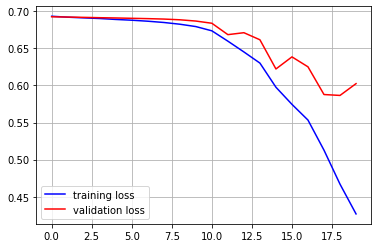

In [66]:
plt.plot(history.history['loss'], 'b', label='training loss')
plt.plot(history.history['val_loss'], 'r', label='validation loss')
plt.legend()
plt.grid(True)
plt.show;

In [ ]:
plt.plot(history.history['accuracy'], 'b', label='training accuracy')
plt.plot(history.history['val_accuracy'], 'r', label='validation accuracy')
plt.legend()
plt.grid(True)
plt.show;